# ***Prediction using Supervised ML***



**Level :Biginner**

In [39]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [ ]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Exploration of the data**

In [ ]:
print(data.info())
print(data.shape)
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None
(25, 2)
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


We notice from the shape that the dataframe contain 25 rows with 2 columns (Hours amd Scores) and from the description we notice that we don't have NULL values . So we will juste check for the outliers.

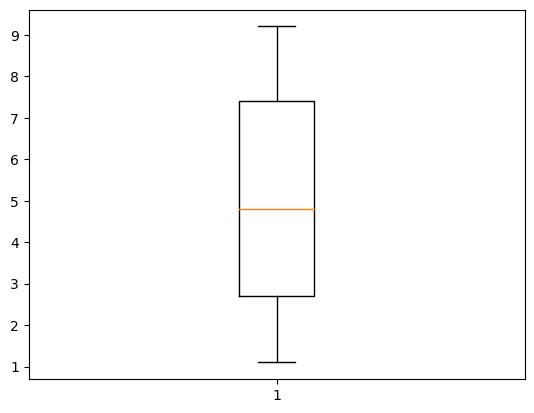

In [30]:
#checking for the outliers using boxplots: Hours
plt.boxplot(data['Hours'])
plt.show()

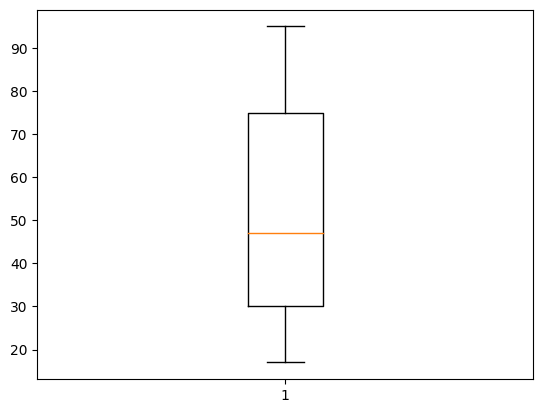

In [31]:
#checking for the outliers using boxplots: Scores
plt.boxplot(data['Scores'])
plt.show()

We notice that there is no outliers for both columns, so we don't need to clean our data because it's already clean.

Creating a data graph to observe if there is a relationship among them.

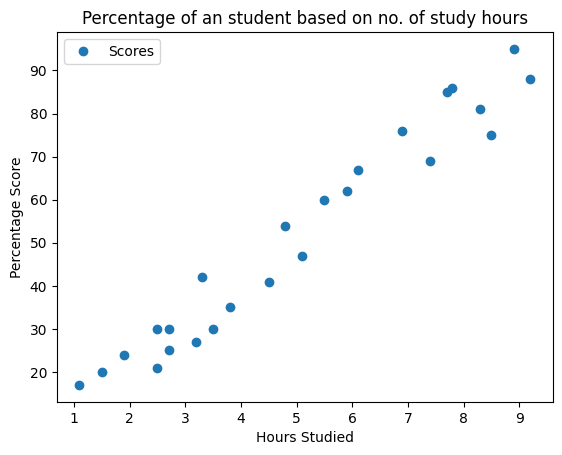

In [32]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Percentage of an student based on no. of study hours')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

we notice that there is a positive linear relation between the number of hours studied and percentage of score

**Preparing the data**

In [33]:
#separing the x and y
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values
#split this data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Training the Algorithm**

In [37]:
#train the model
model = LinearRegression()        #create the model
model.fit(X_train, y_train)       #train the model
y_pred = model.predict(X_test)    #doing the predictions
print (y_pred)


[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


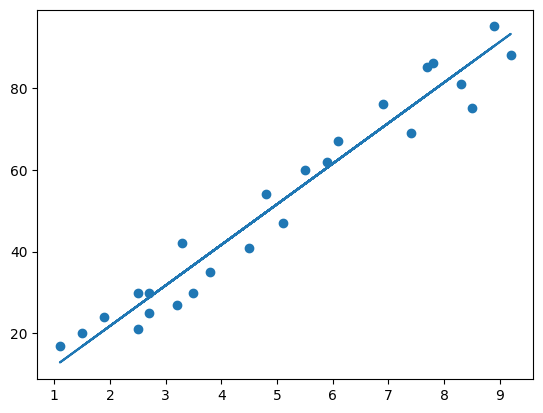

In [38]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

**Evaluating the model**

In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print("R-squared", metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
R-squared 0.9454906892105354


**What will predicted score if a student studies for 9.25 hrs/day?**

In [49]:
hours = np.array([[9.25]])
y_pred = model.predict(hours)
print("Prédiction :", y_pred)


Prédiction : [93.69173249]
